In [1]:
import json

In [2]:
with open("mongo_dump.json") as file:
    users_unprocessed = json.load(file)['users']

In [3]:
from src.scrapped_data_decoders.multi_decoder import MultiDecoder
decoder = MultiDecoder()

In [4]:
user_preferences = [decoder.decode(user) for user in users_unprocessed]

In [5]:
import pandas as pd
df = pd.DataFrame(user_preferences)
df

,is_closed_profile,city_id,city_name,country_id,country_name,sex_id,sex_value,age_is_present,age,political_pref_id,polit_pref_value,life_main_id,life_main_value,people_main_id,people_main_value,alcohol_attitude_id,alcohol_attitude_value
0,False,2,Санкт-Петербург,1,Россия,1,Male,False,0,2,Socialist,0,Unknown,0,Unknown,0,Unknown
1,True,0,Unknown,0,Unknown,1,Male,False,0,0,Unknown,0,Unknown,0,Unknown,0,Unknown
2,False,1,Москва,1,Россия,2,Female,True,32,0,Unknown,0,Unknown,0,Unknown,0,Unknown
3,False,1,Москва,1,Россия,2,Female,False,0,0,Unknown,0,Unknown,0,Unknown,0,Unknown
4,False,2,Санкт-Петербург,1,Россия,2,Female,False,0,0,Unknown,0,Unknown,0,Unknown,0,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87978,False,1952694,Bursa,0,Unknown,2,Female,True,38,0,Unknown,0,Unknown,0,Unknown,0,Unknown
87979,False,60,Казань,1,Россия,1,Male,False,0,3,Moderate,2,Career and Money,6,Humor and Zest,1,Strongly Negative
87980,False,649,Гродно,3,Беларусь,1,Male,False,0,0,Unknown,0,Unknown,0,Unknown,0,Unknown
87981,False,0,Unknown,0,Unknown,2,Female,True,17,0,Unknown,0,Unknown,0,Unknown,0,Unknown


In [6]:
from matplotlib import pyplot as plt
import plotly.express as px

In [7]:
def draw_piechart(
        value_counts: pd.Series, 
        title: str,
        top_n: int = 8, 
        filename: str = "image.png",
    ) -> None:
    present_values = value_counts[:top_n]
    sum_absent_values = value_counts[top_n:].sum()
    if sum_absent_values > 0:
        cropped_value_counts = pd.concat([value_counts[:top_n], pd.Series({"Other": value_counts[9:].sum()})])
    else:
        cropped_value_counts = present_values
    fig = px.pie(
        names=cropped_value_counts.index,
        values=cropped_value_counts.values,
        title=title,
    )
    fig.update_traces(textposition='auto', textinfo='label+percent')
    fig.update(layout_showlegend=False)
    fig.write_image(filename)

# City

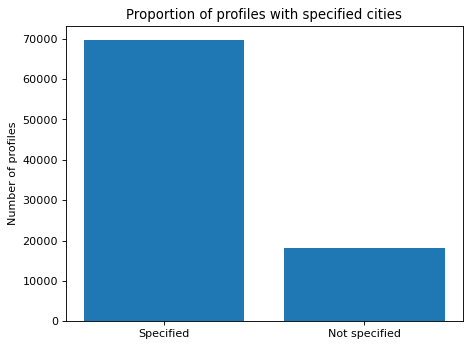

In [8]:
fig, ax = plt.subplots(dpi=80)
plt.bar(
    ["Specified", "Not specified"], 
    (df.city_id != 0).value_counts(),
)
plt.ylabel("Number of profiles")
plt.title("Proportion of profiles with specified cities")
plt.savefig("figures/proportion_of_profiles_with_specified_cities.pdf")

In [9]:
draw_piechart(
    df.city_name.value_counts().drop(['Unknown'], axis='index'),
    title="",
    top_n=5,
    filename="figures/cities_distribution.pdf",
)

# Age

In [10]:
df.age_is_present.value_counts()

False    48345
True     39638
Name: age_is_present, dtype: int64

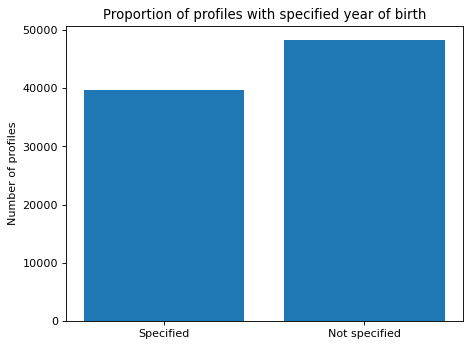

In [11]:
fig, ax = plt.subplots(dpi=80)
plt.bar(
    ["Specified", "Not specified"], 
    (df.age_is_present != 0).value_counts()[[1, 0]],
)
plt.ylabel("Number of profiles")
plt.title("Proportion of profiles with specified year of birth")
plt.savefig("figures/proportion_of_profiles_with_specified_year_of_birth.pdf")

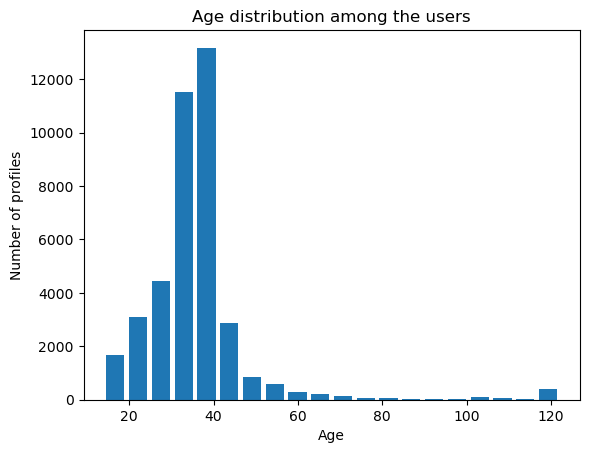

In [12]:
plt.hist(df.age[df.age_is_present].values, bins=20, rwidth=0.8)
plt.ylabel("Number of profiles")
plt.xlabel("Age")
plt.title("Age distribution among the users")
plt.savefig("figures/age_distribution.pdf")

# Life main value

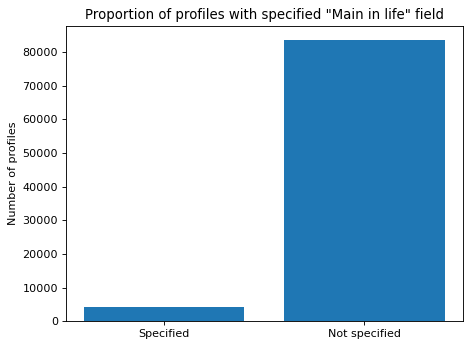

In [13]:
fig, ax = plt.subplots(dpi=80)
plt.bar(
    ["Specified", "Not specified"], 
    (df.life_main_id != 0).value_counts()[[1, 0]],
)
plt.ylabel("Number of profiles")
plt.title('Proportion of profiles with specified "Main in life" field')
plt.savefig("figures/proportion_of_profiles_with_specified_main_in_life.pdf")

In [14]:
draw_piechart(
    df.life_main_value.value_counts().drop(['Unknown'], axis='index'),
    title="",
    top_n=9,
    filename="figures/life_main_distribution.pdf",
)

# People main

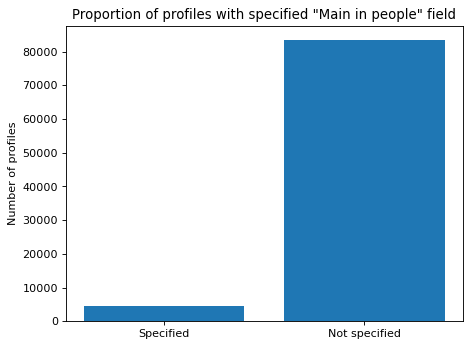

In [15]:
fig, ax = plt.subplots(dpi=80)
plt.bar(
    ["Specified", "Not specified"], 
    (df.people_main_id != 0).value_counts()[[1, 0]],
)
plt.ylabel("Number of profiles")
plt.title('Proportion of profiles with specified "Main in people" field')
plt.savefig("figures/proportion_of_profiles_with_specified_main_in_people.pdf")

In [16]:
draw_piechart(
    df.people_main_value.value_counts().drop(['Unknown'], axis='index'),
    title="",
    top_n=9,
    filename="figures/people_main_distribution.pdf",
)